<a href="https://colab.research.google.com/github/Anel0310/Nombre/blob/main/Statistical_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Descriptive Analysis**

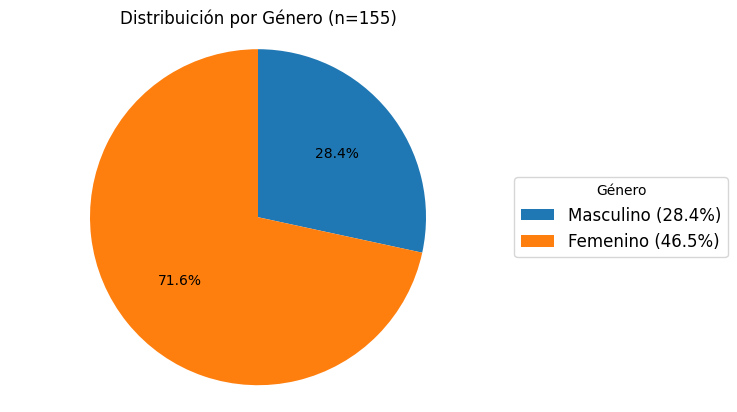

In [7]:
import matplotlib.pyplot as plt

# Datos
labels = ['Masculino', 'Femenino']
sizes = [44, 111]
percentages = [44*100/155, 72*100/155]

# Crear gráfico de pastel
fig, ax = plt.subplots()
wedges, texts, autotexts = ax.pie(
    sizes,
    autopct='%1.1f%%',
    startangle=90,
    counterclock=False,
)
ax.axis('equal')  # Para que el pastel sea un círculo

# Añadir leyenda con tamaño de fuente
ax.legend(
    wedges,
    [f'{label} ({p:.1f}%)' for label, p in zip(labels, percentages)],
    title="Género",
    loc="center left",
    bbox_to_anchor=(1, 0, 0.5, 1),
    fontsize=12 # Puedes ajustar este valor
)

# Cambiar el tamaño de fuente de las proporciones dentro del pastel
for autotext in autotexts:
    autotext.set_fontsize(10) # Puedes ajustar este valor

plt.title('Distribuición por Género (n=155)')
plt.savefig("Prueba.png", dpi=300)
plt.show()

In [1]:
# -*- coding: utf-8 -*-
"""
Análisis Estadístico de Infecciones por Levaduras
Google Colab Notebook
"""

# 1. Instalación de dependencias (si es necesario)
# !pip install scipy pandas

# 2. Importación de librerías
import numpy as np
import pandas as pd
from scipy.stats import chisquare, pearsonr, spearmanr

# 3. Análisis por Género
# ----------------------
print("=== Análisis por Género ===")
# Datos
obs_gender = np.array([44, 111])      # [Masculino, Femenino]
labels_gender = ['Masculino', 'Femenino']

# Frecuencias esperadas (uniforme)
exp_gender = np.full_like(obs_gender, obs_gender.sum() / len(obs_gender), dtype=float)

# Prueba χ² de bondad de ajuste
chi2_g, p_g = chisquare(f_obs=obs_gender, f_exp=exp_gender)
df_g = len(obs_gender) - 1

# Resultados
df_gender = pd.DataFrame({
    'Género': labels_gender,
    'Observados': obs_gender,
    'Esperados': exp_gender.astype(int)
})
display(df_gender)
print(f"χ² = {chi2_g:.4f}, df = {df_g}, p-valor = {p_g:.4e}\n")


# 4. Análisis por Grupo Etario
# -----------------------------
print("=== Análisis por Grupo Etario ===")
# Datos
age_groups = ["0–9", "10–20", "21–40", ">40"]
obs_age = np.array([6, 11, 53, 85])
percent_age = obs_age / obs_age.sum() * 100

# Prueba χ² de bondad de ajuste (uniforme)
exp_age = np.full_like(obs_age, obs_age.sum() / len(obs_age), dtype=float)
chi2_age, p_age = chisquare(f_obs=obs_age, f_exp=exp_age)
df_age = len(obs_age) - 1

# Resultados
df_age_dist = pd.DataFrame({
    'Edad (años)': age_groups,
    'Observados': obs_age,
    'Esperados': exp_age.astype(int),
    'Porcentaje (%)': percent_age.round(1)
})
display(df_age_dist)
print(f"χ² = {chi2_age:.4f}, df = {df_age}, p-valor = {p_age:.4e}\n")


# 5. Correlación Edad vs. Casos
# -----------------------------
print("=== Correlación Edad vs. Casos ===")
# Convertir rangos de edad a valores numéricos (midpoints)
midpoints = np.array([4.5, 15, 30.5, 60])  # Asumiendo >40 ≈ 60
# Spearman
rho, p_spearman = spearmanr(midpoints, obs_age)
# Pearson
r, p_pearson = pearsonr(midpoints, obs_age)
print(f"Spearman’s rho = {rho:.4f}, p-valor = {p_spearman:.4e}")
print(f"Pearson’s r    = {r:.4f}, p-valor = {p_pearson:.4e}\n")


# 6. Análisis por Especie
# ------------------------
print("=== Análisis por Especie ===")
# Datos
species = [
    "C. albicans", "C. glabrata", "C. krusei", "C. dubliniensis",
    "C. famata", "C. parapsilosis", "C. tropicalis",
    "Geotrichum capitatum", "G. candidum", "Trichosporon asahii",
    "Mix: alb+glab", "Mix: krusei+geot", "Mix: krusei+glab"
]
obs_species = np.array([74,49,8,3,2,2,1,2,1,2,6,1,4])
percent_species = obs_species / obs_species.sum() * 100

# Prueba χ² de bondad de ajuste (uniforme)
exp_species = np.full_like(obs_species, obs_species.sum()/len(obs_species), dtype=float)
chi2_s, p_s = chisquare(f_obs=obs_species, f_exp=exp_species)
df_s = len(obs_species) - 1

# Resultados
df_species = pd.DataFrame({
    'Especie': species,
    'Observados': obs_species,
    'Esperados': exp_species.round(1),
    'Porcentaje (%)': percent_species.round(1)
})
display(df_species)
print(f"χ² = {chi2_s:.4f}, df = {df_s}, p-valor = {p_s:.4e}\n")


# 7. Conclusiones rápidas
print("=== Conclusiones ===")
print("- Hay diferencias significativas según género (p<0.0001).")
print("- La distribución por edad no es uniforme (p<0.0001).")
print("- Edad y casos están fuertemente correlacionados.")
print("- La frecuencia entre especies difiere claramente de la uniformidad (p≈0).")


=== Análisis por Género ===


,Género,Observados,Esperados
0,Masculino,44,77
1,Femenino,111,77


χ² = 28.9613, df = 1, p-valor = 7.3839e-08

=== Análisis por Grupo Etario ===


,Edad (años),Observados,Esperados,Porcentaje (%)
0,0–9,6,38,3.9
1,10–20,11,38,7.1
2,21–40,53,38,34.2
3,>40,85,38,54.8


χ² = 107.9935, df = 3, p-valor = 2.9655e-23

=== Correlación Edad vs. Casos ===
Spearman’s rho = 1.0000, p-valor = 0.0000e+00
Pearson’s r    = 0.9776, p-valor = 2.2371e-02

=== Análisis por Especie ===


,Especie,Observados,Esperados,Porcentaje (%)
0,C. albicans,74,11.9,47.7
1,C. glabrata,49,11.9,31.6
2,C. krusei,8,11.9,5.2
3,C. dubliniensis,3,11.9,1.9
4,C. famata,2,11.9,1.3
5,C. parapsilosis,2,11.9,1.3
6,C. tropicalis,1,11.9,0.6
7,Geotrichum capitatum,2,11.9,1.3
8,G. candidum,1,11.9,0.6
9,Trichosporon asahii,2,11.9,1.3


χ² = 517.7290, df = 12, p-valor = 3.7255e-103

=== Conclusiones ===
- Hay diferencias significativas según género (p<0.0001).
- La distribución por edad no es uniforme (p<0.0001).
- Edad y casos están fuertemente correlacionados.
- La frecuencia entre especies difiere claramente de la uniformidad (p≈0).
